# Overview

Job searching is one of the biggest concern for many people. It is important to know job market in general and understand the industry and role that you are interested in so that you can better prepare for entering an new industry or job-hopping. In this project, I will first investigate job market geographically, second experience requirement and last key skills requirement, industry wise.

### Prepareation

#### 1. Load Data

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import geopandas as gpd
import geoplot as gplt

data = []
with open('marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv', newline='', encoding="utf8") as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        sub = np.array(row)
        if sub[2] == "":
            continue
        data.append(sub)
pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',None)
data_df=pd.read_csv('marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv')
data = np.array(data)
data_df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


#### 2. Data wrangling

#### 1). First check the type of data

In [4]:
data_df.dtypes

Uniq Id                    object
Crawl Timestamp            object
Job Title                  object
Job Salary                 object
Job Experience Required    object
Key Skills                 object
Role Category              object
Location                   object
Functional Area            object
Industry                   object
Role                       object
dtype: object

#### 2). Let's check missing data

In [5]:
data_df.isna().any()

Uniq Id                    False
Crawl Timestamp            False
Job Title                   True
Job Salary                  True
Job Experience Required     True
Key Skills                  True
Role Category               True
Location                    True
Functional Area             True
Industry                    True
Role                        True
dtype: bool

#### Let's check the pattern and frequency of the missing

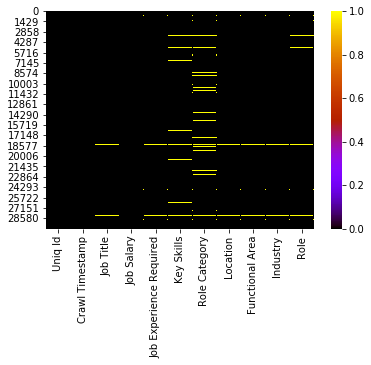

In [6]:
sns.heatmap(data_df.isnull(),cbar=True,cmap='gnuplot')

#### Let's see the missing information in detail

In [7]:
selectedInfo = ['Job Title', 'Job Salary',
                'Job Experience Required', 'Key Skills', 
                'Role Category', 'Location',
                'Functional Area', 'Industry', 'Role']
missingVals = []
for col in selectedInfo:
    print('Number of missing values in {}: {}'.format(col, data_df[col].isna().value_counts()[1]))
    missingVals.append((col, data_df[col].isna().value_counts()[1]))
print('Total entries:{}'.format(len(data_df)))

Number of missing values in Job Title: 575
Number of missing values in Job Salary: 50
Number of missing values in Job Experience Required: 573
Number of missing values in Key Skills: 1271
Number of missing values in Role Category: 2305
Number of missing values in Location: 577
Number of missing values in Functional Area: 573
Number of missing values in Industry: 573
Number of missing values in Role: 901
Total entries:30000


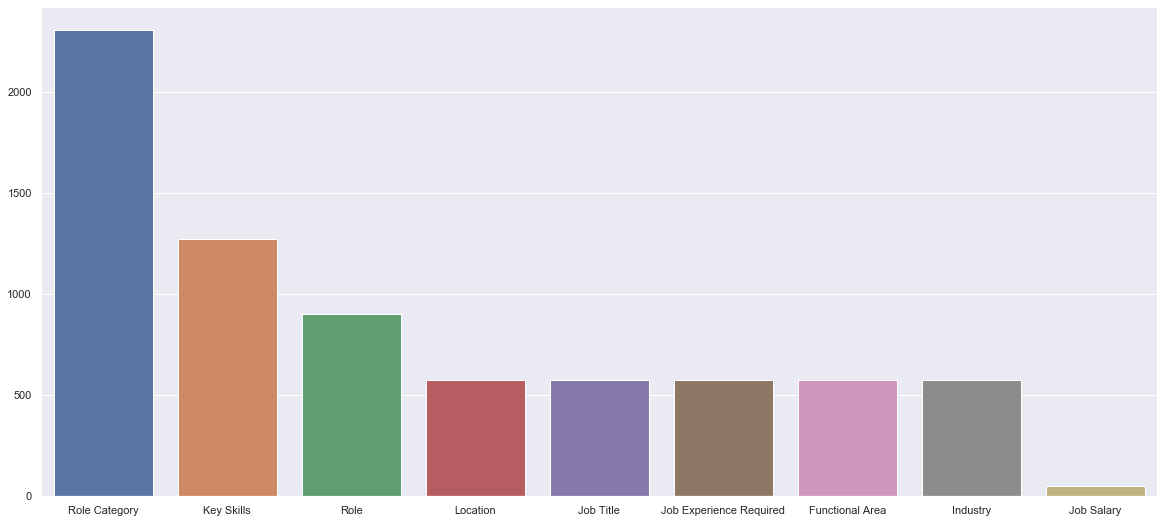

In [8]:
missingVals.sort(key=lambda x: x[1], reverse = True)
x_pos = [i for i in range(len(missingVals))]
nums = [words[1] for words in missingVals]
x = [words[0] for words in missingVals]
sns.set(rc={'figure.figsize':(20,9)})
sns.barplot(x=x, y=nums)


In [9]:
data_df.dropna(axis=0,inplace=True)
data_df.isna().any()

Uniq Id                    False
Crawl Timestamp            False
Job Title                  False
Job Salary                 False
Job Experience Required    False
Key Skills                 False
Role Category              False
Location                   False
Functional Area            False
Industry                   False
Role                       False
dtype: bool

## Visualize Jobs Market on India Map

### 1. Get a india map! We will visualize the number of jobs in the India Map. 
#### There are 4000 cities and towns in India and it would be too messy to visualize each of them on the map. Therefore, I choose to visualize number of jobs in 28 states and 8 union territories in India

In [10]:
fp = 'india-polygon.shp'
map_df = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [11]:
map_df["st_nm"]

0     Andaman and Nicobar Islands
1               Arunachal Pradesh
2                           Assam
3                           Bihar
4                      Chandigarh
5                    Chhattisgarh
6          Dadra and Nagar Haveli
7                   Daman and Diu
8                             Goa
9                         Gujarat
10                        Haryana
11               Himachal Pradesh
12                      Jharkhand
13                      Karnataka
14                         Kerala
15                    Lakshadweep
16                 Madhya Pradesh
17                    Maharashtra
18                        Manipur
19                      Meghalaya
20                        Mizoram
21                       Nagaland
22                          Delhi
23                     Puducherry
24                         Punjab
25                      Rajasthan
26                         Sikkim
27                     Tamil Nadu
28                      Telangana
29            

#### After inspecting the location data in data frame, I decide to delete everything in the "()" because they are district instead of states.

In [12]:
# ind will pass the industry into the function, if ind == '', this means that we are looking at all industries
def get_ind_city_cnt(ind):
    cityCnt = {}
    sub_data = data_df[data_df['Industry'].str.contains(ind)]
    for i in range(len(sub_data)):
        cities = sub_data.iloc[i, 7]
        if "(" in cities:
            index = cities.find("(")
            cities = cities[:index]
        cities = cities.split(",")
        uniqueCities = set()
        for city in cities:
            tmp = city
            # cleaning data
            if ")" in tmp:
                print(city)
            if "/" in tmp:
                sameName = city.split("/")
                sameName.sort()
                tmp = sameName[0]
            tmp = tmp.strip()
            uniqueCities.add(tmp.lower())
        for city in uniqueCities:
            cityCnt[city] = cityCnt.get(city, 0) + 1

    # some location information need to be deleted
    cleanSet = ["electronics city", "1700000", "300000", "400000", "500000", "700000"]
    for i in cleanSet:
        if i in cityCnt:
            del cityCnt[i]
    return cityCnt

In [13]:
cityCnt = get_ind_city_cnt("")
print("number of unique locations in dataset is", len(cityCnt))

number of unique locations in dataset is 425


### 2. Map locations to states

#### Mapping strategy: map locations to state -> sum up jobs for each state -> plot on the map
#### 1). map loations to state

We need a dataset that map location to state

In [14]:
cityData = pd.ExcelFile("Town_Codes_2001.xls")
city_df = cityData.parse("Sheet1")
city_df.head()

,Sl. No.,City/Town,Urban Status,State Code,State/Union territory,District Code,District
0,1.0,1 SGM,C.T.,8,Rajasthan,1,Ganganagar
1,2.0,3 STR,C.T.,8,Rajasthan,1,Ganganagar
2,3.0,A.Thirumuruganpoondi,T.P.,33,Tamil Nadu,12,Coimbatore
3,4.0,A.Vellalapatti,T.P.,33,Tamil Nadu,24,Madurai
4,5.0,Aadityana,C.T.,24,Gujarat,11,Porbandar


Find unmatched states between two dataset

In [15]:
notFound = set([])
for name in city_df["State/Union territory"]:
    if map_df[map_df["st_nm"].isin([name])].empty:
        notFound.add(name)

notFound

{'Andaman & Nicobar Islands *',
 'Chandigarh *',
 'Dadra & Nagar Haveli *',
 'Daman & Diu *',
 'Delhi *',
 'Jammu & Kashmir',
 'Lakshadweep *',
 'Orissa',
 'Pondicherry *',
 'Uttaranchal',
 nan}

Let's creat a mapping to match each mismatched name in two datasets

In [16]:
stateTran = {'Andaman & Nicobar Islands *':'Andaman and Nicobar Islands' ,
             "Chandigarh *":'Chandigarh' ,
             "Dadra & Nagar Haveli *":'Dadra and Nagar Haveli',
             "Daman & Diu *":'Daman and Diu',
             "Lakshadweep *":'Lakshadweep',
             "Delhi *":'Delhi',
             "Pondicherry *":'Puducherry',
             "Uttaranchal": 'Uttarakhand',
             "Orissa":'Odisha',
             "Jammu & Kashmir": 'Jammu and Kashmir'
            }

Find not matched cities between locations in job data and cities in city_state data and create another mapping relation

In [17]:
notFoundCities = []
cityToState = {}
for name in cityCnt.keys():
    if name == "":
        continue
    tmp = name[0].upper()+name[1:]
    if city_df[city_df["City/Town"].isin([tmp])].empty:
        if city_df[city_df["State/Union territory"].isin([tmp])].empty:
            sub = tmp.split()
            add = False
            for i in sub:
                i = i[0].upper()+i[1:]
                if city_df[city_df["City/Town"].isin([i])].empty and city_df[city_df["State/Union territory"].isin([i])].empty:
                    add = True
                else:
                    add = False
            if add:
                notFoundCities.append(name)
print("Number of location that is no matched in either cities or states",len(notFoundCities))

Number of location that is no matched in either cities or states 167


I have saved all unmatched locations into a file so that it looks cleaner and compact in the code

In [18]:
# # Save
# np.save('unmatchedLocations.npy', cityTran) 

# Load
cityTran = np.load('unmatchedLocations.npy',allow_pickle='TRUE').item()

#### 2). Sum up location for each state

In [19]:
# retrieve state according to its location
def getState(city):
    if city == "":
        return ""
    tmp = city[0].upper()+city[1:]
    if city_df[city_df["City/Town"].isin([tmp])].empty:
        if city_df[city_df["State/Union territory"].isin([tmp])].empty:
            sub = tmp.split()
            add = False
            for i in sub:
                i = i[0].upper()+i[1:]
                if city_df[city_df["City/Town"].isin([i])].empty:
                    if city_df[city_df["State/Union territory"].isin([i])].empty:
                        add = True
                    else:
                        return city_df.loc[city_df["State/Union territory"]==i]["State/Union territory"].values[0]
                else:
                    return city_df.loc[city_df["City/Town"]==i]["State/Union territory"].values[0]
                    
            if add:
                return ""
    else:
        return city_df.loc[city_df["City/Town"]==tmp]["State/Union territory"].values[0]

# translate the state
def validState(state):
    if state in stateTran:
        return stateTran[state]
    else:
        return state

# get the number of jobs with respect to its state
def get_state_cnt(cityCnt):
    stateCnt = {}
    missing = []
    for city, num in cityCnt.items():
        state = getState(city)
        if state == "" or state is None:
            if city in cityTran:
                state = validState(cityTran[city])
                stateCnt[state] = stateCnt.get(state, 0) + num
            else:
                missing.append(city)

        else:
            state = validState(state)
            stateCnt[state] = stateCnt.get(state, 0) + num
    return stateCnt, missing

In [20]:
stateCnt, missing = get_state_cnt(cityCnt)
print("The number of locations that is still not mapped to states", len(missing))

The number of locations that is still not mapped to states 38


#### We can see that our cleaning is successful. These location information can not be mapped to states on india map

In [21]:
missing

['australia',
 'haryana',
 'nasik',
 'india',
 'qatar',
 '',
 'oman',
 'uae',
 'saudi arabia',
 'in',
 'hr',
 'other - other',
 'canada',
 'not specified',
 'andra',
 'other city',
 'metros',
 'kalu',
 'hong kong',
 'verna',
 'cambodia',
 'china',
 'ap',
 'malaysia',
 'ncr',
 'singapore',
 'atlanta',
 'columbia',
 'nearby hometown',
 'pan india',
 'rupa',
 'krishna',
 'united states',
 'spain',
 'japan',
 'freelancer',
 'vietnam',
 'indonesia']

#### 3). Plot the job info on the india map

In [25]:
def plot_geo(stateCnt, ind):
    stateData = []
    for key, val in stateCnt.items():
        stateData.append((key, val))
    for state in map_df["st_nm"]:
        if state not in stateCnt:
            stateData.append((state, 0))
    
    jobNum = [0 for _ in range(len(DATA_df))]
    new_col = ind+" Number of Jobs"
    DATA_df[new_col] = jobNum
    
    for state, num in stateData:
        DATA_df.loc[DATA_df["st_nm"] == state, new_col] = num
    merged= map_df.merge(DATA_df, on = "st_nm", how = "left")
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    #fig, ax = plt.subplots(1, figsize=(10, 10))
    ax1.axis("off")
    ax1.set_title(ind+" Job data", fontdict={"fontsize": "25", "fontweight" : "10"})
    merged.plot(ax=ax1,column=new_col,cmap="YlGnBu", linewidth=0.8, edgecolor="0", legend=True,markersize=[39.739192, -104.99033])
    merged = merged.sort_values(new_col, ascending=False)
    sns.barplot(x=merged['st_nm'][:10], y=merged[new_col][:10],ax=ax2)
    
    
def ind_geo_dist(ind):
    city_cnt = get_ind_city_cnt(ind)
    state_cnt, missing = get_state_cnt(city_cnt)
    plot_geo(state_cnt, ind)

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


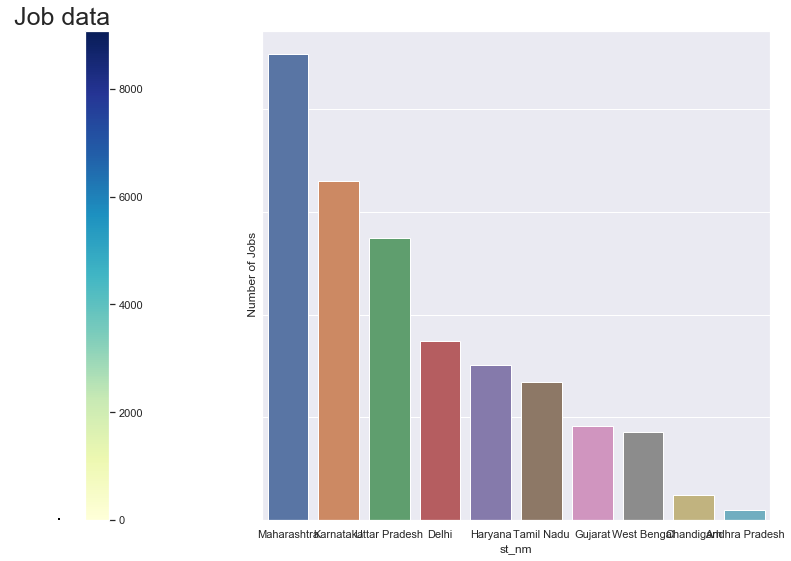

In [26]:
DATA_df = pd.read_excel("data_ecxel.xlsx")
DATA_df.rename(columns={"Name of State / UT": "st_nm"},inplace=True)
ind_geo_dist("")

#### We can see that India job opportunities was not evenly dstributed. Some areas have way more jobs than other areas

## Industry & Geo Distribution

#### Let's how job distribution varies according to each industry

In [22]:
data_df['Industry'].value_counts()[:10]

IT-Software, Software Services               9672
Recruitment, Staffing                        2496
BPO, Call Centre, ITeS                       1691
Banking, Financial Services, Broking         1544
Education, Teaching, Training                1070
IT-Software / Software Services               786
Medical, Healthcare, Hospitals                574
Internet, Ecommerce                           532
Construction, Engineering, Cement, Metals     499
Strategy, Management Consulting Firms         476
Name: Industry, dtype: int64

#### As the "IT-Software / Software Services" is the same as "IT-Software, Software Services" and "Recruitment / Staffing" is the same as "Recruitment , Staffing" , let's first merge two data

In [23]:
data_df.loc[data_df['Industry'].str.contains('IT-Software / Software Services',case=False)]='IT-Software, Software Services'
data_df.loc[data_df['Industry'].str.contains('Recruitment / Staffing',case=False)]='Recruitment , Staffing'

In [25]:
data_df['Industry'].value_counts()[:10]

IT-Software, Software Services                 10458
Recruitment, Staffing                           2496
BPO, Call Centre, ITeS                          1691
Banking, Financial Services, Broking            1544
Education, Teaching, Training                   1070
Medical, Healthcare, Hospitals                   574
Internet, Ecommerce                              532
Construction, Engineering, Cement, Metals        499
Strategy, Management Consulting Firms            476
Automobile, Auto Anciliary, Auto Components      461
Name: Industry, dtype: int64

In [26]:
print("We will focus on the top 10 industries because they compose", '{:.1%}'.format(sum(data_df['Industry'].value_counts()[:10])/len(data_df)), 'of all data')

We will focus on the top 10 industries because they compose 73.3% of all data


C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


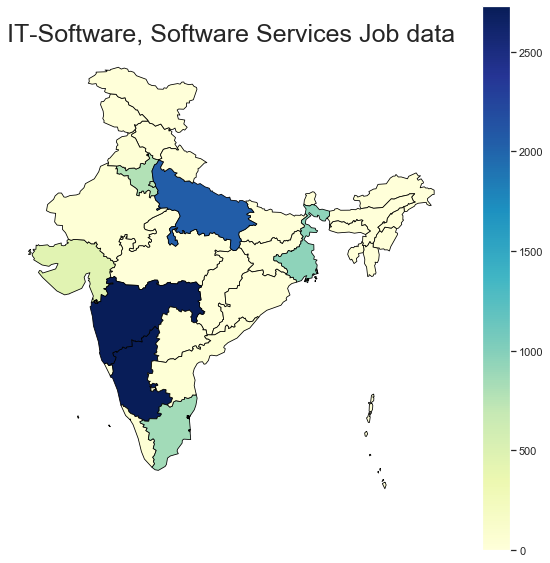

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


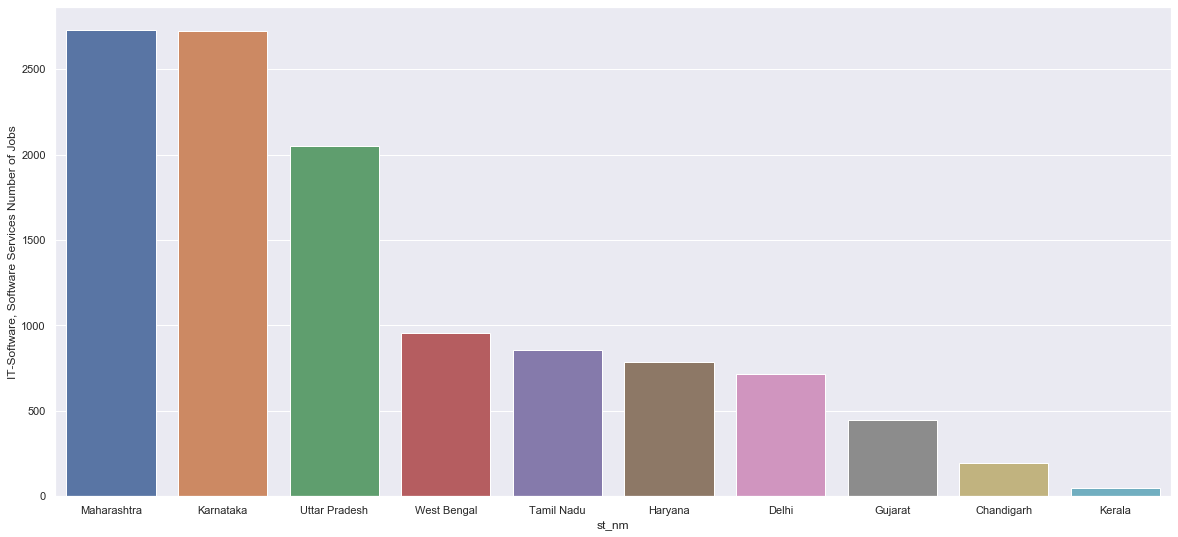

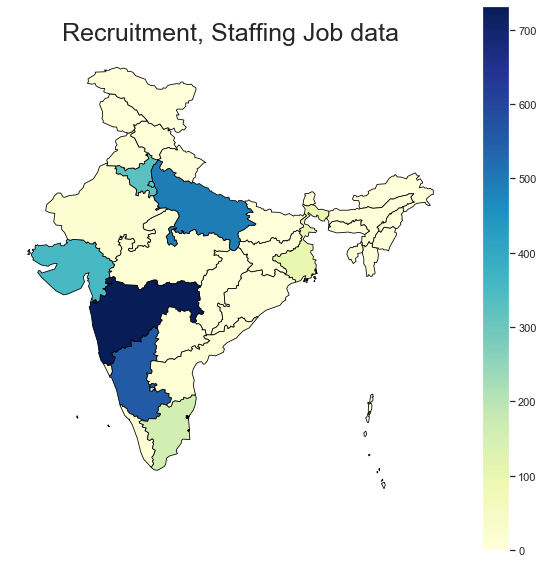

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


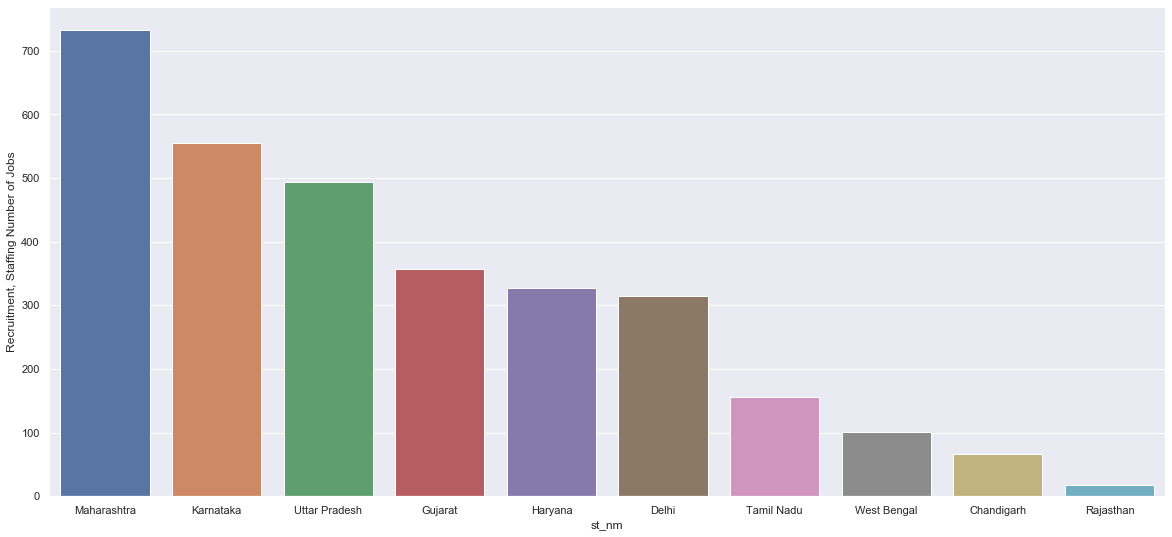

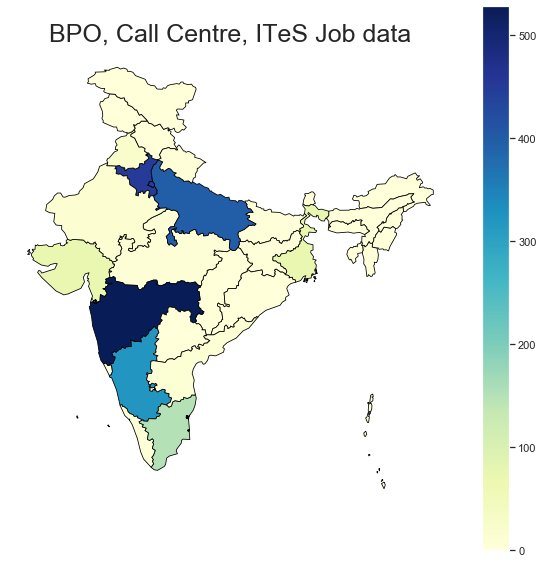

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


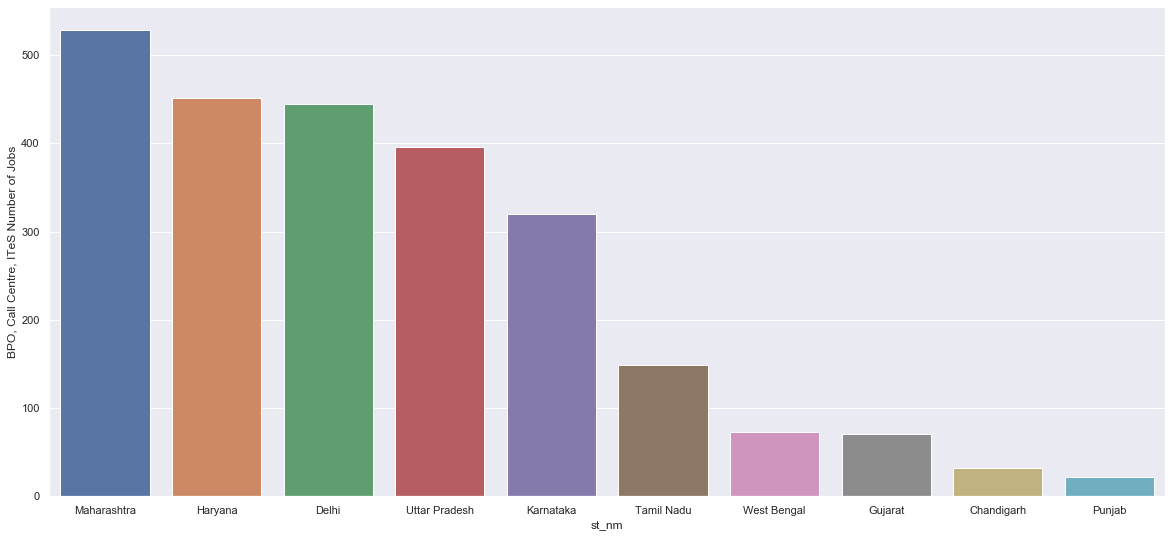

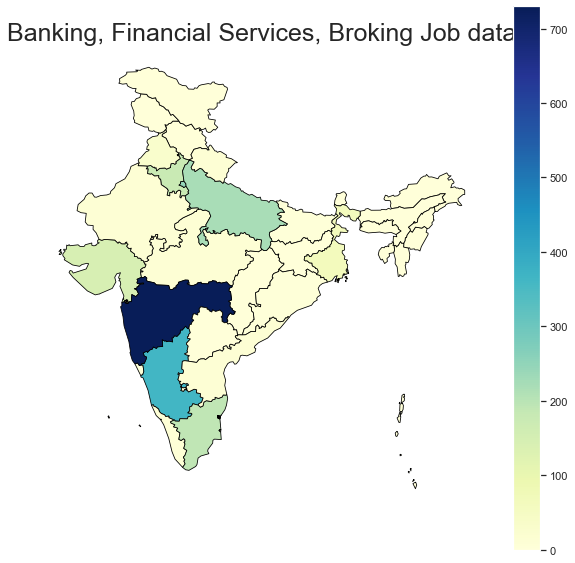

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


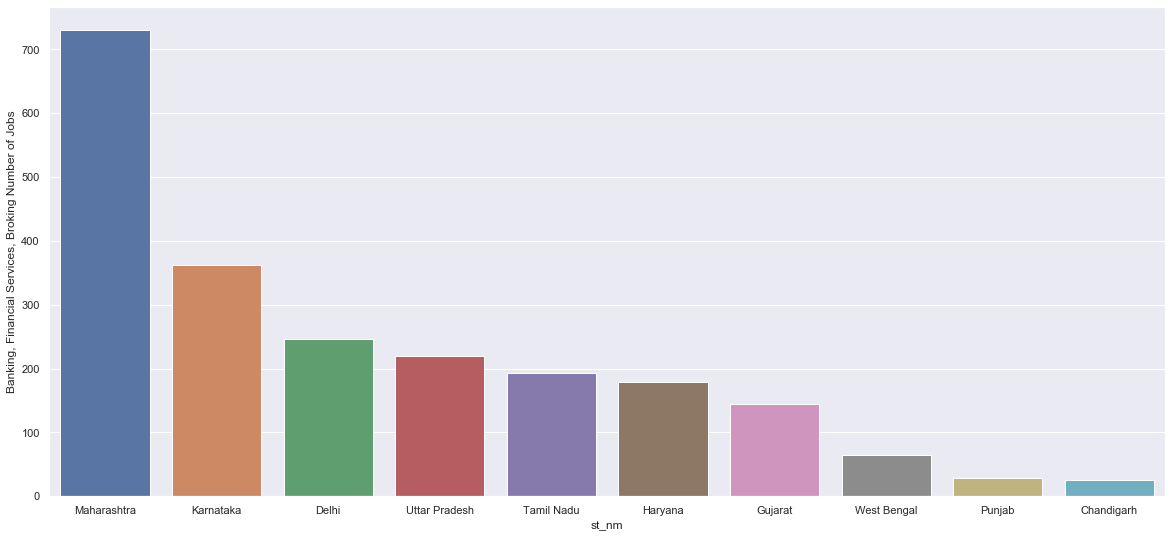

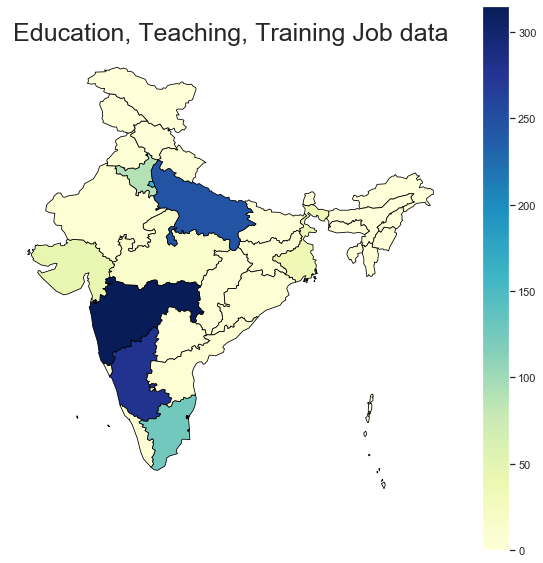

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


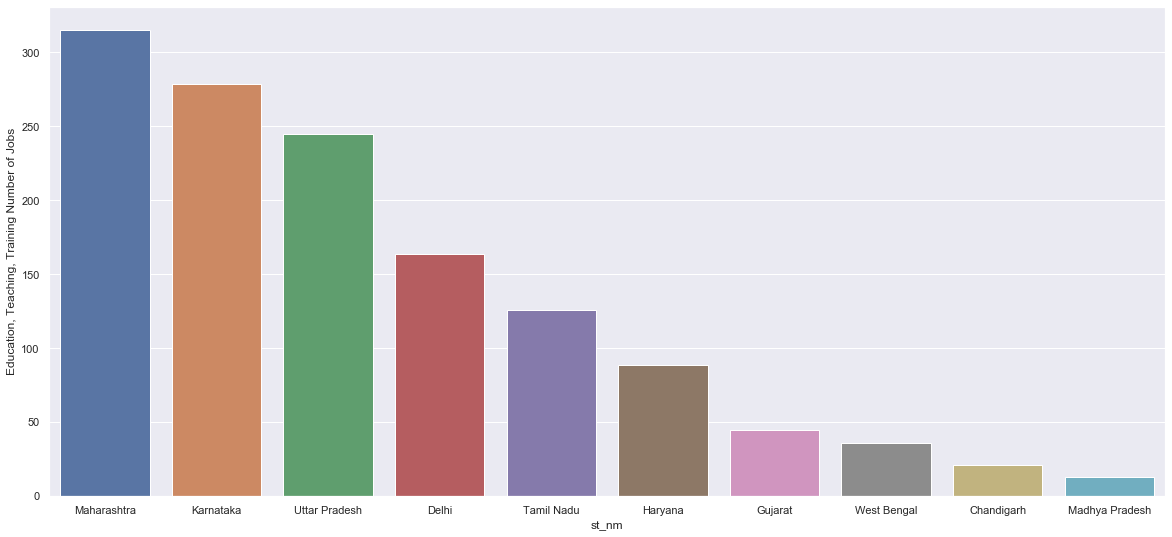

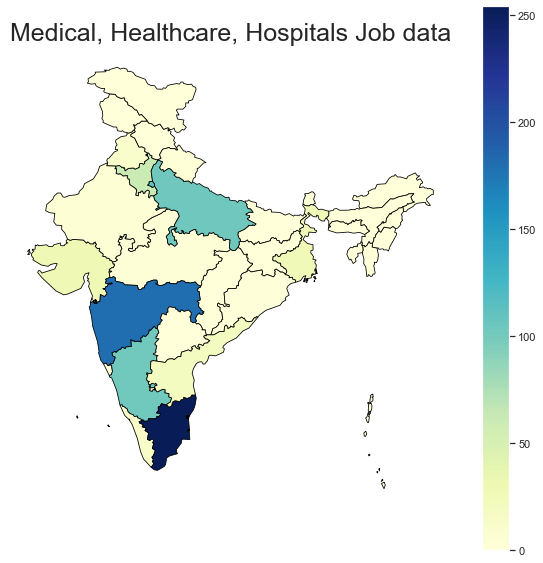

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


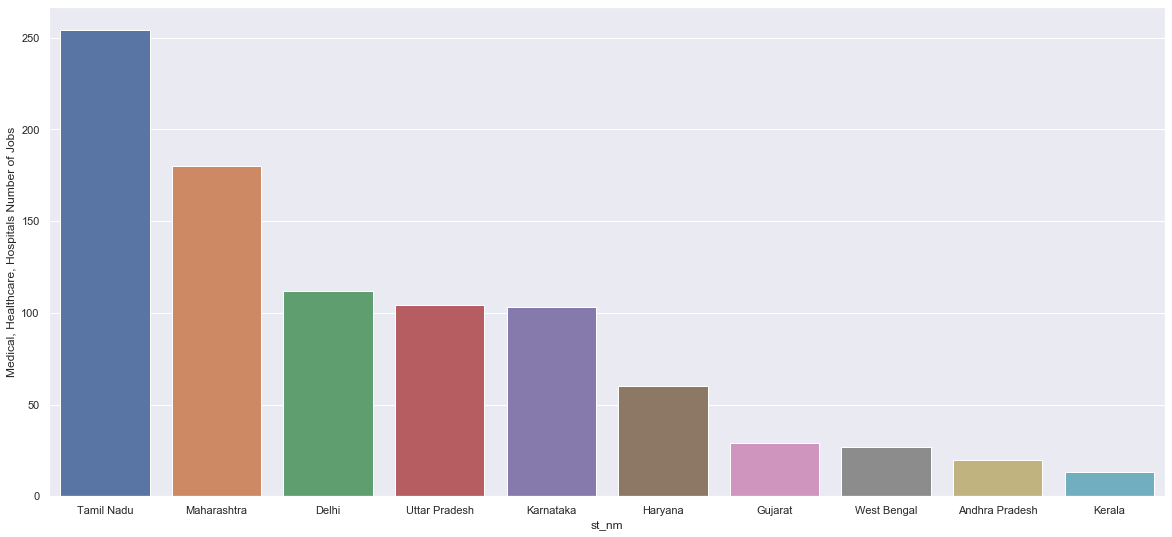

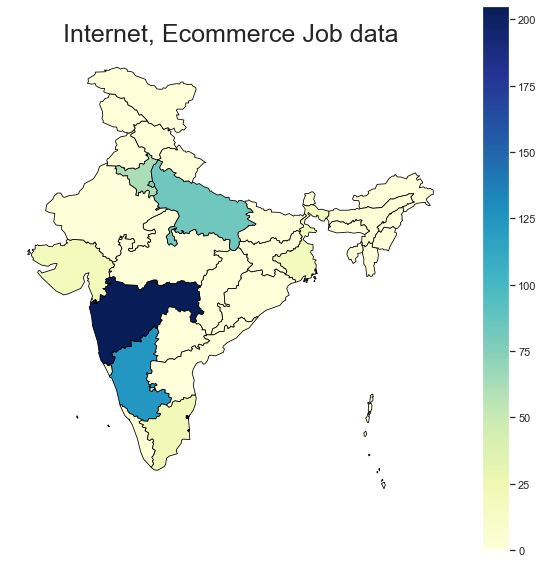

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


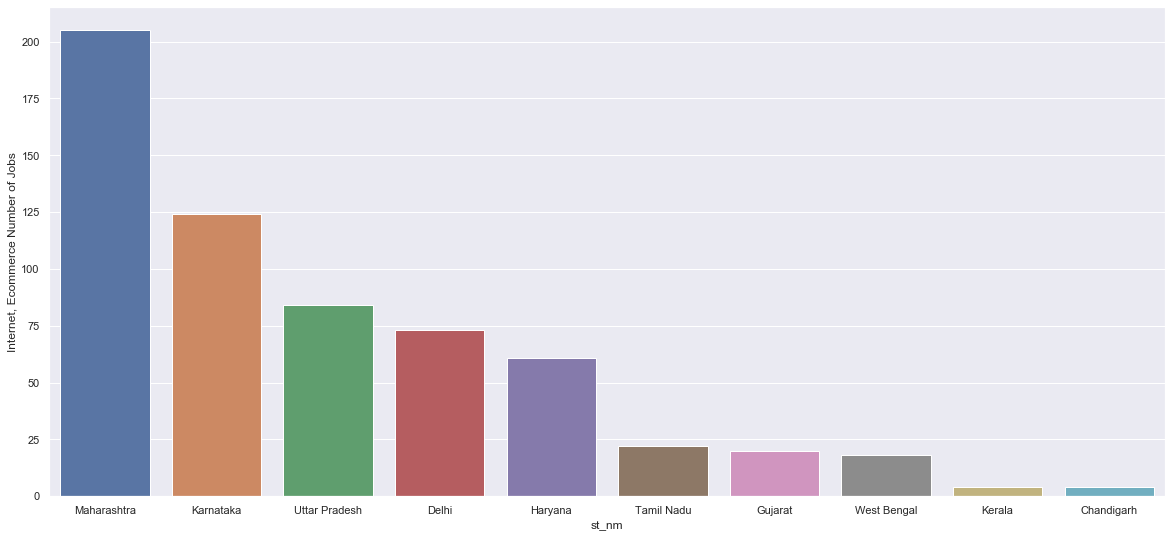

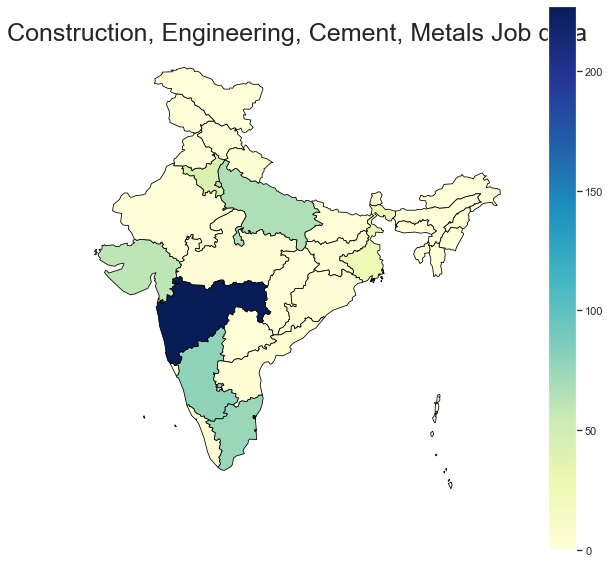

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


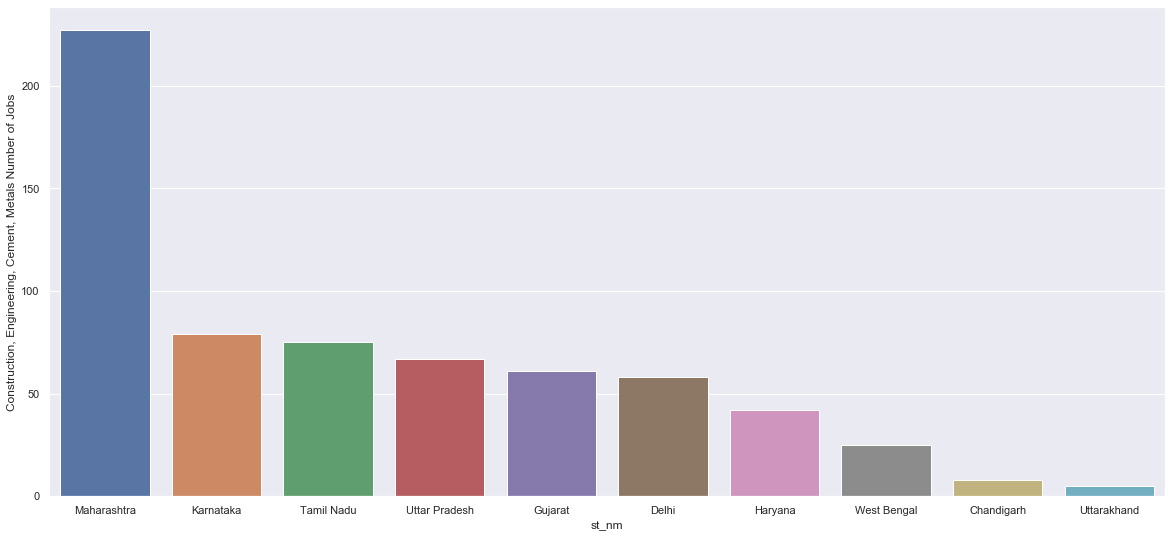

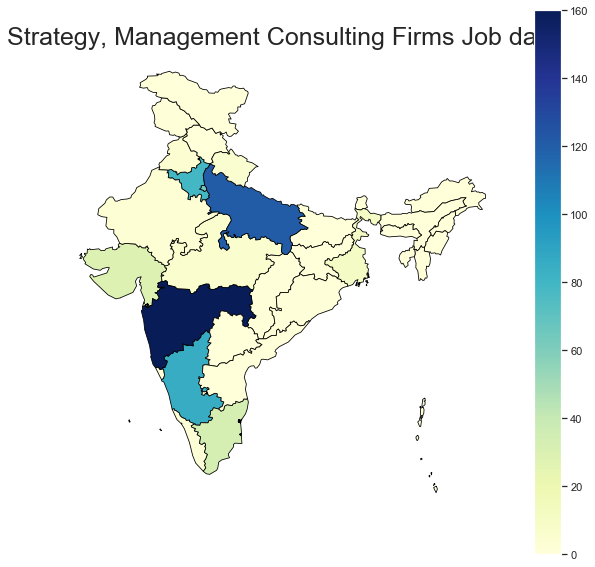

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


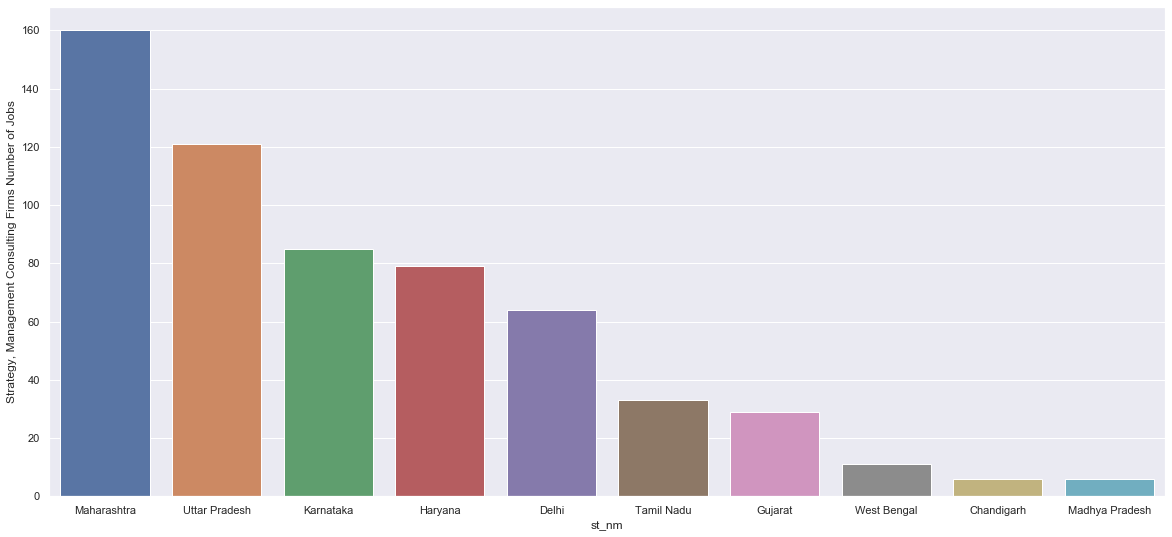

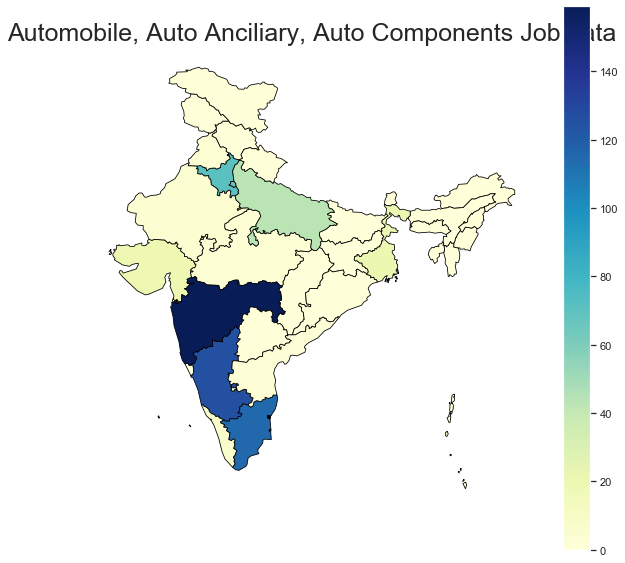

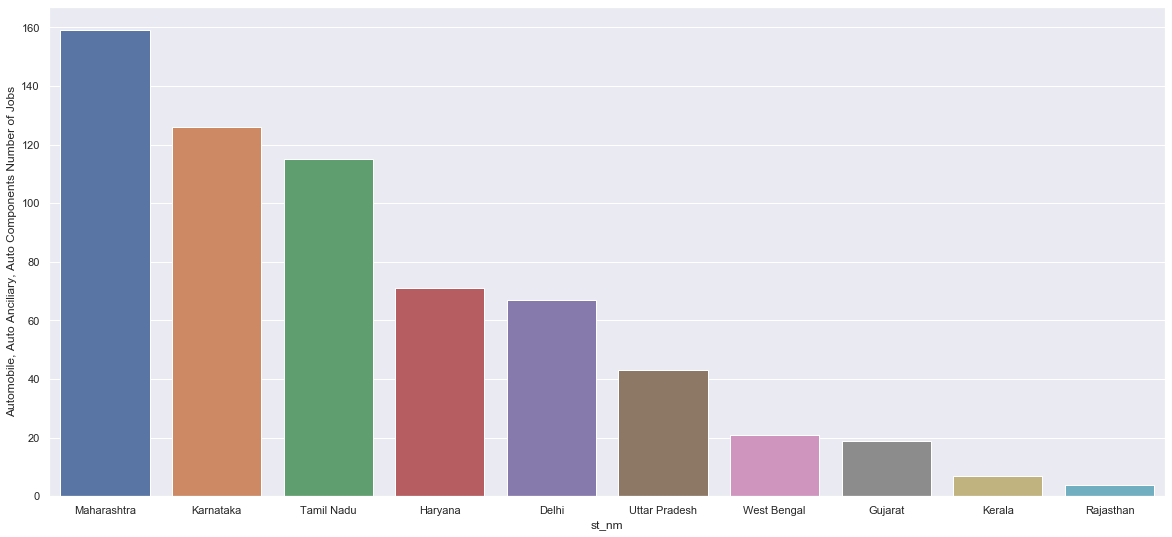

In [28]:
top_ten_state = data_df['Industry'].value_counts()[:10].index
for ind in top_ten_state:
    ind_geo_dist(ind)

#### Job seekers may take these as a reference when thinking of moving from one place to another to pursue a career in specific industires
#### Of course, it is clear that Maharashtra the most opportunities. Other factors, such as living costs, living environment and salary should also be considered.

## Job Salary

In [29]:
data_df['Job Salary'].value_counts()[:10]

 Not Disclosed by Recruiter       18355
IT-Software, Software Services      786
Openings: 1                         229
 Not Disclosed by Recruiter         216
 2,00,000 - 3,00,000 PA.            139
 2,00,000 - 4,00,000 PA.            135
 3,00,000 - 5,00,000 PA.            123
 50,000 - 3,00,000 PA.              108
 2,00,000 - 5,00,000 PA.             97
 3,00,000 - 8,00,000 PA.             95
Name: Job Salary, dtype: int64

#### As most of the information is not disclosed, we will not further investigate on these

## Job Experience

In [30]:
data_df['Job Experience Required'].value_counts()[:10]

2 - 5 yrs     1859
2 - 7 yrs     1541
5 - 10 yrs    1406
3 - 8 yrs     1267
1 - 3 yrs     1086
1 - 6 yrs      966
3 - 5 yrs      939
1 - 5 yrs      897
0 - 5 yrs      862
0 - 1 yrs      791
Name: Job Experience Required, dtype: int64

#### We see that there're many entry is overlapped with one another. I'd like to set them into 4 categories<br>0-1 -> Newbie <br>1-5 -> Semiprofessional<br> 5-10 -> Professional<br>10-?  Expert
#### 1. Create a new column for "Experience Categories"

In [31]:
exp_cat = ['' for _ in range(len(data_df))]
data_df['Experience Categories'] = exp_cat
data_df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Experience Categories
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,


#### 2. Let's map the "Job Experience Required" to "Experience Categories" according to the categories I created above
Note that 1-7 will be classified as both semiprofessional and professional

In [33]:
CAT = {(0, 1):"Newbie", (1, 5):"Semiprofessional", (5, 10):"Professional", (10, 100):"Expert"}
def get_cat(yrs):
    if len(yrs) != 2:
        return ""
    start, end = str(yrs[0]), str(yrs[1])
    start, end = start.strip(), end.strip()
    if not start.isnumeric():
        return ""
    start, end = int(start), int(end)
    res = ''
    for key, val in CAT.items():
        if start <= key[1] and end > key[0]:
            res += ' ' + val
    if start >= 10:
        res += ' Expert'
    res = res.strip()
    return res

for i in range(len(data_df)):
    job_req = data_df.iloc[i, 4].lower()
    #print(job_req)
    index = job_req.find('y')
    job_req = job_req[:index]
    yrs = job_req.split('-')
    cat = get_cat(yrs)
    data_df.iloc[i, -1] = cat

In [34]:
data_df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Semiprofessional Professional
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Semiprofessional
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",Newbie
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Newbie Semiprofessional
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Semiprofessional


#### Great! Now, let's see how many jobs are in each category

Newbie : 7840
Semiprofessional : 21339
Professional : 14668
Expert : 3311


([<matplotlib.patches.Wedge at 0x19888115dd8>,
 [Text(0.9533477090980725, 0.5487514424194774, 'Newbie'),
  Text(-0.8584720880821609, 0.6877686195108459, 'Semiprofessional'),
  Text(0.16708926238539815, -1.0872355671129894, 'Professional'),
  Text(1.073349297340139, -0.24066841483549534, 'Expert')],
 [Text(0.5200078413262214, 0.29931896859244217, '16.6%'),
  Text(-0.46825750259026955, 0.37514651973318863, '45.3%'),
  Text(0.09113959766476261, -0.5930375820616306, '31.1%'),
  Text(0.5854632530946212, -0.13127368081936108, '7.0%')])

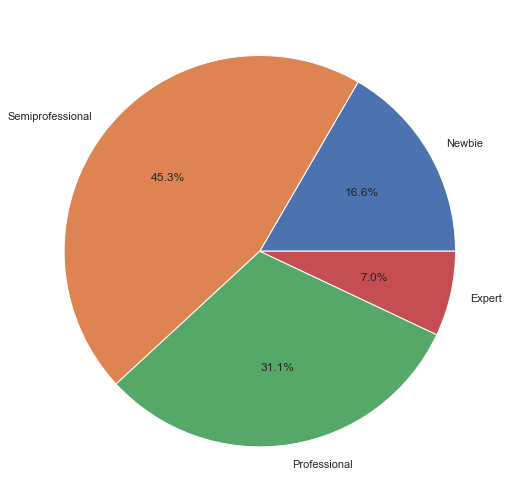

In [37]:
value_cnt = {"Newbie":0, "Semiprofessional":0, "Professional":0, "Expert":0}
for i in range(len(data_df)):
    sub_cat = data_df.iloc[i, -1]
    sub_cat = sub_cat.split()
    for key in value_cnt.keys():
        if key in sub_cat:
            value_cnt[key] += 1
for key, val in value_cnt.items():
    print(key, ":", val)
plt.pie(x=[val for val in value_cnt.values()], labels=[key for key in value_cnt.keys()],autopct='%1.1f%%')

In [30]:
val in value_cnt.values()

True

Many company needs semiprofessional and professional. Meanwhile, newbie is also welcome. However, experts is not in urgent for many company.

## Industry & Experience

#### Let's see how industry related to experience requirement

#### 1. Newbie Recruitment

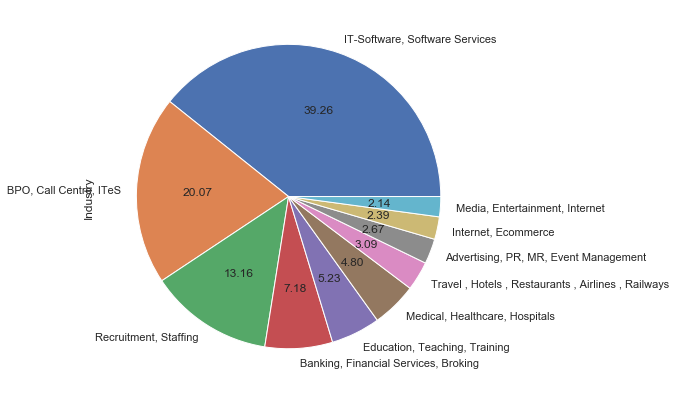

In [35]:
new_df = data_df[data_df['Experience Categories'].str.contains('Newbie', case=True)]
new_cnt = new_df['Industry'].value_counts()
plot = new_cnt[:10].plot.pie(figsize=(7, 7), autopct='%.2f')

#### 2. Semiprofessional Recruitment

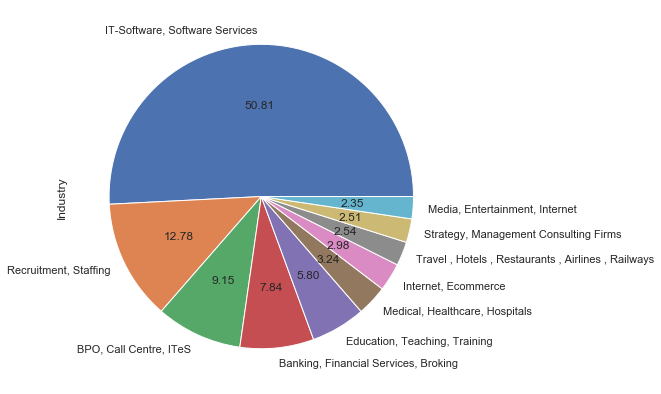

In [36]:
semipro_df = data_df[data_df['Experience Categories'].str.contains('Semiprofessional', case=True)]
semipro_cnt = semipro_df['Industry'].value_counts()
plot = semipro_cnt[:10].plot.pie(figsize=(7, 7), autopct='%.2f')

#### 3. Professional Recruitment

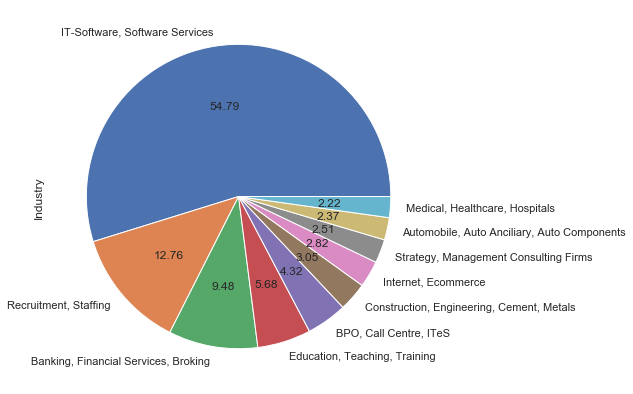

In [37]:
pro_df = data_df[data_df['Experience Categories'].str.contains('Professional', case=True)]
pro_cnt = pro_df['Industry'].value_counts()[:10]
plot = pro_cnt[:10].plot.pie(figsize=(7, 7), autopct='%.2f')

#### Expert Recruitment

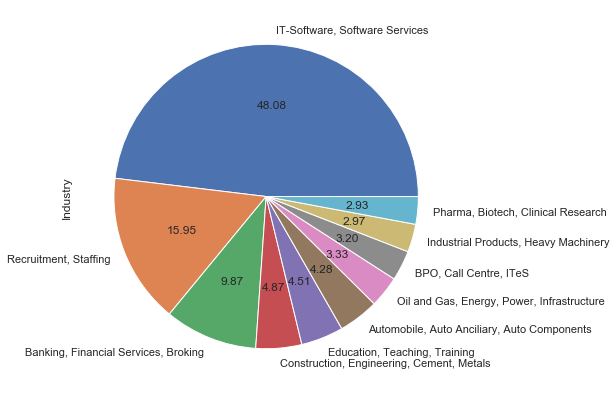

In [38]:
exp_df = data_df[data_df['Experience Categories'].str.contains('Expert', case=True)]
exp_cnt = exp_df['Industry'].value_counts()[:10]
plot = exp_cnt[:10].plot.pie(figsize=(7, 7), autopct='%.2f')

#### Pie charts tell us that jobs opportunites provided by each industry at 4 experience level.
#### As IT industry provides more job opportunities, it is not quite useful if we want to know if some industries prefer semiprofessal over others or reverse.

#### Let's look at recruitment patterns in each industry

In [39]:
pro_cnt = pd.DataFrame(pro_cnt)
pro_cnt.reset_index(inplace=True)
pro_cnt.rename(columns={'Industry':'Professional'},inplace=True)
semipro_cnt = pd.DataFrame(semipro_cnt)
semipro_cnt.reset_index(inplace=True)
semipro_cnt.rename(columns={'Industry':'Semiprofessional'},inplace=True)
new_cnt = pd.DataFrame(new_cnt)
new_cnt.reset_index(inplace=True)
new_cnt.rename(columns={'Industry':'Newbie'},inplace=True)
exp_cnt = pd.DataFrame(exp_cnt)
exp_cnt.reset_index(inplace=True)
exp_cnt.rename(columns={'Industry':'Expert'},inplace=True)

In [40]:
pro_cnt.head()

,index,Professional
0,"IT-Software, Software Services",5571
1,"Recruitment, Staffing",1297
2,"Banking, Financial Services, Broking",964
3,"Education, Teaching, Training",578
4,"BPO, Call Centre, ITeS",439


In [41]:
merged = new_cnt.merge(semipro_cnt, on = "index", how = "left")
merged = merged.merge(pro_cnt, on = "index", how = "left")
merged = merged.merge(exp_cnt, on = "index", how = "left")
merged.head()

,index,Newbie,Semiprofessional,Professional,Expert
0,"IT-Software, Software Services",2297,7770,5571.0,1067.0
1,"BPO, Call Centre, ITeS",1174,1400,439.0,71.0
2,"Recruitment, Staffing",770,1955,1297.0,354.0
3,"Banking, Financial Services, Broking",420,1199,964.0,219.0
4,"Education, Teaching, Training",306,887,578.0,100.0


#### Convert Nan to 0 and label correct name for columns

In [42]:
merged = merged.fillna(0)
merged.head()

,index,Newbie,Semiprofessional,Professional,Expert
0,"IT-Software, Software Services",2297,7770,5571.0,1067.0
1,"BPO, Call Centre, ITeS",1174,1400,439.0,71.0
2,"Recruitment, Staffing",770,1955,1297.0,354.0
3,"Banking, Financial Services, Broking",420,1199,964.0,219.0
4,"Education, Teaching, Training",306,887,578.0,100.0


#### Check NaN

In [43]:
merged.isnull().values.any()

False

#### I want to convert these number to percentage in their industry and find out which industry prefer professional, semiprofessional or newbie.

In [44]:
total, per_semi, per_pro, per_new, per_exp= [], [], [], [], []

for i in range(len(merged)):
    sub_t = merged["Semiprofessional"][i] + merged["Professional"][i] + merged["Newbie"][i]+merged['Expert'][i]
    total.append(sub_t)
    per_semi.append(merged['Semiprofessional'][i] / sub_t)
    per_pro.append(merged['Professional'][i] / sub_t)
    per_new.append(merged['Newbie'][i] / sub_t)
    per_exp.append(merged['Expert'][i] / sub_t)
merged["Total Number of Jobs"] = total
merged["Percent of Semipro"] = per_semi
merged["Percent of Pro"] = per_pro
merged["Percent of New"] = per_new
merged["Percent of Exp"] = per_exp
merged.head()

,index,Newbie,Semiprofessional,Professional,Expert,Total Number of Jobs,Percent of Semipro,Percent of Pro,Percent of New,Percent of Exp
0,"IT-Software, Software Services",2297,7770,5571.0,1067.0,16705.0,0.465130,0.333493,0.137504,0.063873
1,"BPO, Call Centre, ITeS",1174,1400,439.0,71.0,3084.0,0.453956,0.142348,0.380674,0.023022
2,"Recruitment, Staffing",770,1955,1297.0,354.0,4376.0,0.446755,0.296389,0.175960,0.080896
3,"Banking, Financial Services, Broking",420,1199,964.0,219.0,2802.0,0.427909,0.344040,0.149893,0.078158
4,"Education, Teaching, Training",306,887,578.0,100.0,1871.0,0.474078,0.308926,0.163549,0.053447


#### As some jobs is available for two or more experience categories, total number of jobs may increase for each industry
#### Let's plot the recruitment pattern for top ten industries

C:\Users\jeffe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


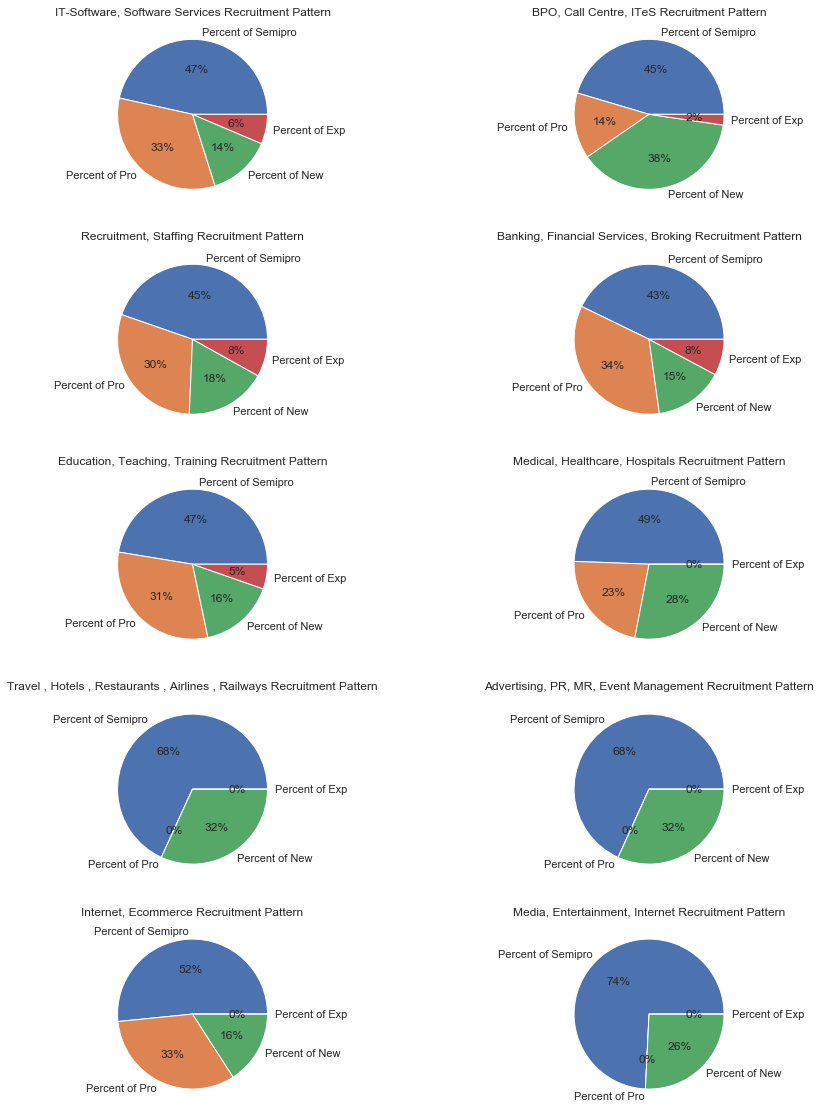

In [45]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
for i in range(5):
    for j in range(2):
        val = [merged.iloc[i*2+j, k] for k in range(6, 10)]
        index = ['Percent of Semipro', 'Percent of Pro', 'Percent of New', 'Percent of Exp']
        tmp = pd.DataFrame({"Val":val}, index = index)
        axs[i, j].pie(tmp, autopct='%.0f%%', labels=tmp.index)
        axs[i, j].set_title(merged.iloc[i*2+j,0] + ' Recruitment Pattern')


In [49]:
merged = merged.sort_values("Percent of New", ascending=False)
print('<', merged.iloc[0][0], '> is The industry that recruits most Newbies','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][8]))
merged = merged.sort_values("Percent of Semipro",ascending=False)
print('<', merged.iloc[0][0], '> is The industry that recruits most Semiprofessionals','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][6]))
merged = merged.sort_values("Percent of Pro",ascending=False)
print('<', merged.iloc[0][0], '> is The industry that recruits most Professionals','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][7]))
merged = merged.sort_values("Percent of Exp",ascending=False)
print('<', merged.iloc[0][0], '> is The industry that recruits most Experts','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][9]))

< Fresher, Trainee, Entry Level > is The industry that recruits most Newbies 
Percent of recruitment is 62.5%
< Semiconductors / Electronics > is The industry that recruits most Semiprofessionals 
Percent of recruitment is 94.7%
< Construction, Engineering, Cement, Metals > is The industry that recruits most Professionals 
Percent of recruitment is 36.3%
< Oil and Gas, Energy, Power, Infrastructure > is The industry that recruits most Experts 
Percent of recruitment is 25.4%


In [50]:
merged = merged.sort_values("Percent of New", ascending=True)
print('<', merged.iloc[0][0], '> is The industry that recruits least Newbies','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][8]))
merged = merged.sort_values("Percent of Semipro",ascending=True)
print('<', merged.iloc[0][0], '> is The industry that recruits least Semiprofessionals','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][6]))
merged = merged.sort_values("Percent of Pro",ascending=True)
print('<', merged.iloc[0][0], '> is The industry that recruits least Professionals','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][7]))
merged = merged.sort_values("Percent of Exp",ascending=True)
print('<', merged.iloc[0][0], '> is The industry that recruits least Experts','\nPercent of recruitment is', '{:.1%}'.format(merged.iloc[0][9]))

< Semiconductors / Electronics > is The industry that recruits least Newbies 
Percent of recruitment is 5.3%
< Fresher, Trainee, Entry Level > is The industry that recruits least Semiprofessionals 
Percent of recruitment is 37.5%
< Fresher, Trainee, Entry Level > is The industry that recruits least Professionals 
Percent of recruitment is 0.0%
< Fresher, Trainee, Entry Level > is The industry that recruits least Experts 
Percent of recruitment is 0.0%


#### Notice that there're multiple industries whose recruitment percent may be the same

## Skills for Top 10 Industries

In [56]:
from wordcloud import WordCloud, STOPWORDS

In [70]:
def topSkills(Industry):
    ind = data_df[data_df['Industry'] == Industry]
    keySkill = ind['Key Skills'].value_counts()
    keySkill.head()
    skillCnt = {}
    wcloud = []
    for row, cnt in keySkill.iteritems():
        skill_arr = row.split('|')
        for skill in skill_arr:
            skill = skill.strip().lower()
            skillCnt[skill] = skillCnt.get(skill, 0) + cnt
            for i in range(cnt):
                wcloud.append(skill)
    skillCnt = pd.Series(skillCnt).to_frame('Count')
    skillCnt.reset_index(inplace=True)
    skillCnt.rename(columns={'index':'Skill'},inplace=True)
    skillCnt.head()
    #print(skillCnt)
    skillCnt = skillCnt.sort_values("Count",ascending=False)
    skillRange = 10 if len(skillCnt) >= 10 else len(skillCnt)
    ax = skillCnt.head(skillRange).plot(kind='bar', figsize=(9, 5))
    plt.xticks(range(skillRange), skillCnt.head(skillRange)['Skill'])
    ax.set_ylabel("Total Number of Skill")
    ax.set_xlabel("Skill")
    t = Industry+" Industry Top Skills"
    plt.title(t)
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    min_font_size = 10).generate(str(wcloud))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

#### Let's see what are the top 10 key skills in IT industry

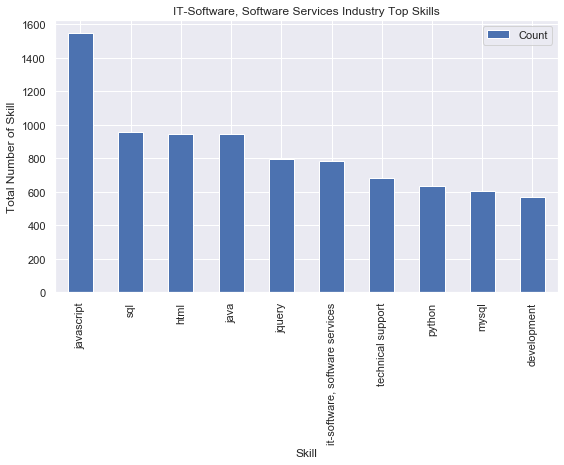

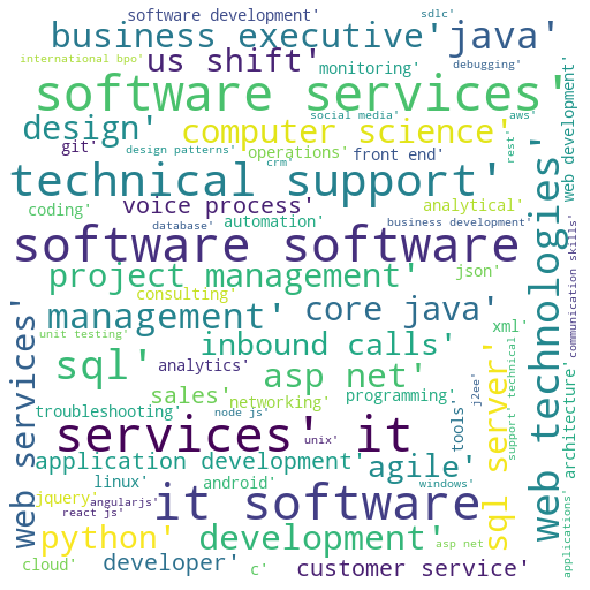

In [71]:
topSkills('IT-Software, Software Services')

#### Let's see what are the top 10 key skills in Recuitment industry

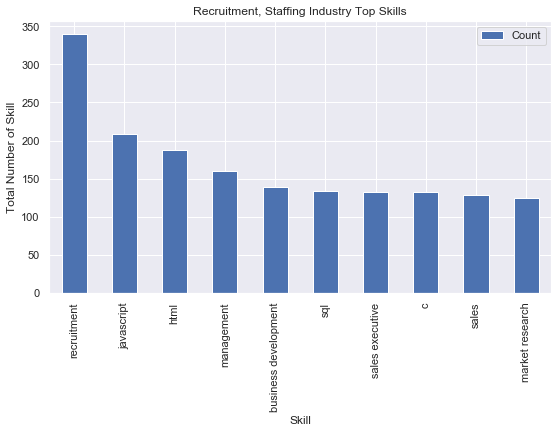

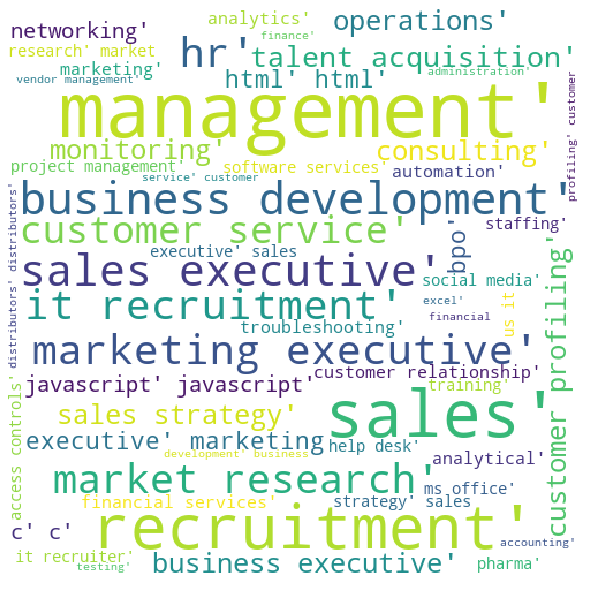

In [72]:
topSkills('Recruitment, Staffing')

#### Let's see what are the top 10 key skills in BPO Call Center industry

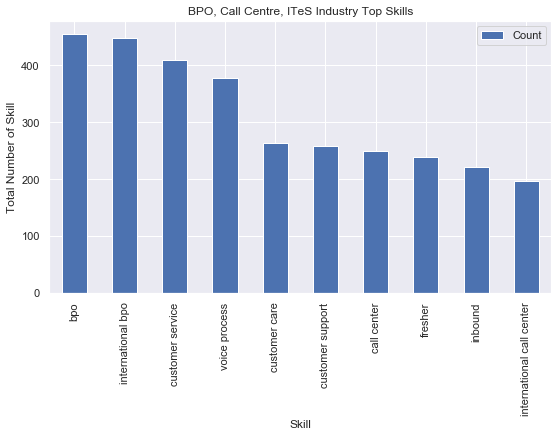

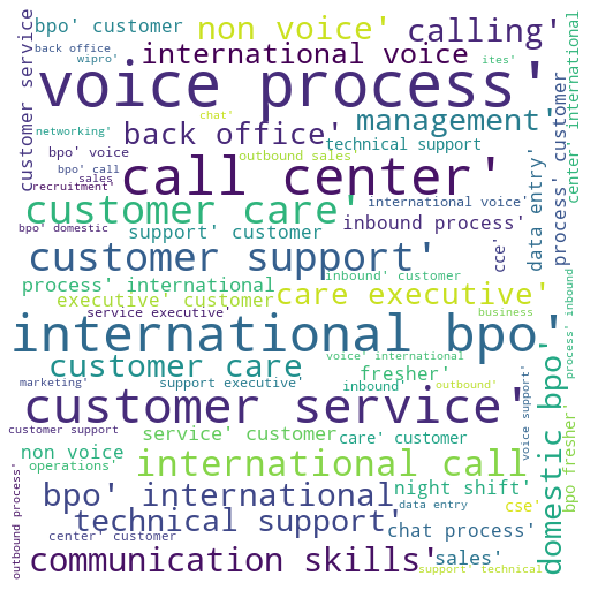

In [73]:
topSkills('BPO, Call Centre, ITeS')

#### Let's see what are the top 10 key skills in Banking, Finanacial Services, Broking industry

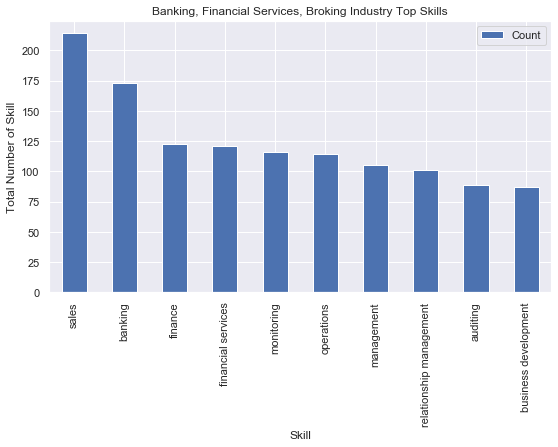

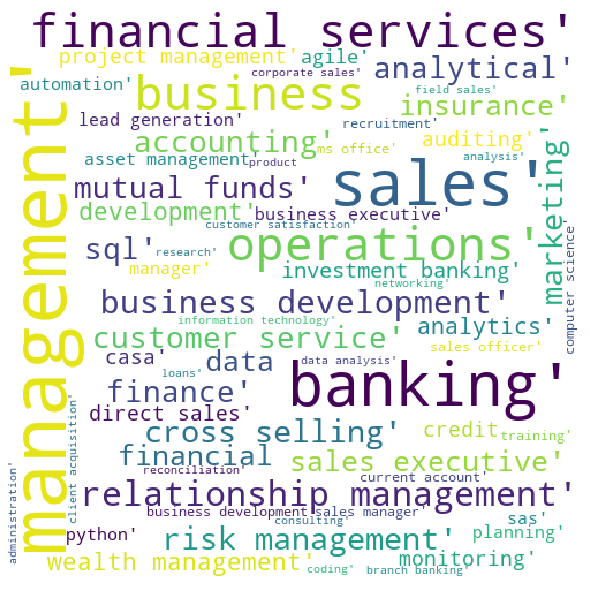

In [74]:
topSkills('Banking, Financial Services, Broking')

#### Let's see what are the top 10 key skills in Education, Teaching, Training industry

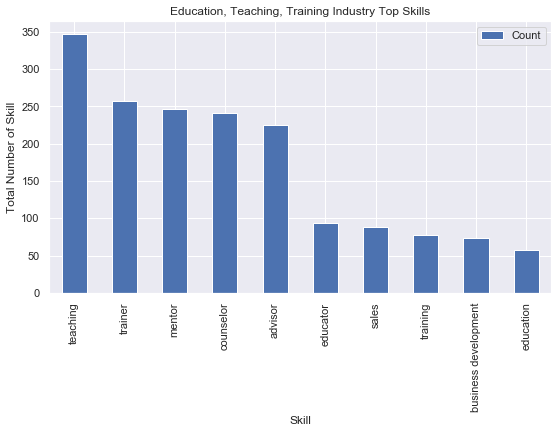

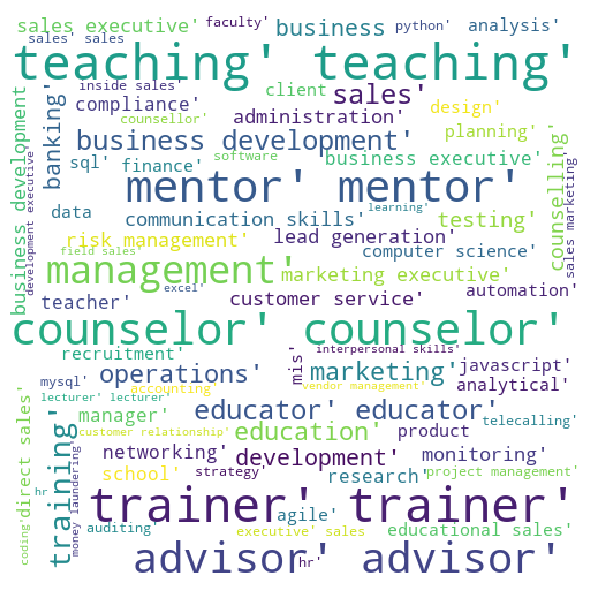

In [75]:
topSkills('Education, Teaching, Training')

#### Let's see what are the top 10 key skills in Medical, Healthcare, Hospitals industry

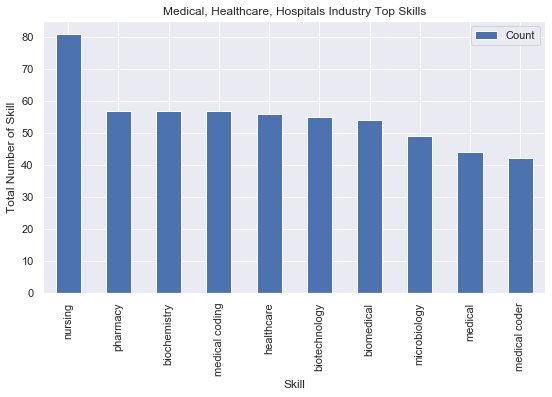

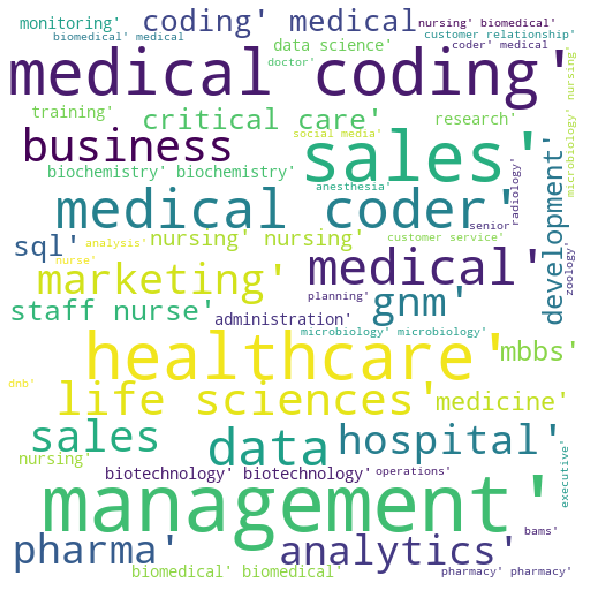

In [76]:
topSkills('Medical, Healthcare, Hospitals')

#### Let's see what are the top 10 key skills in Strategy, Management Consulting Firms industry

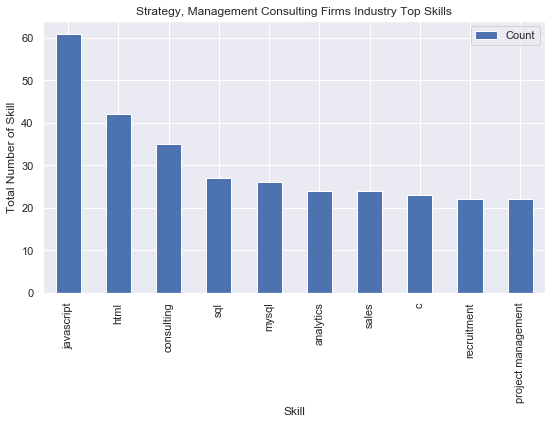

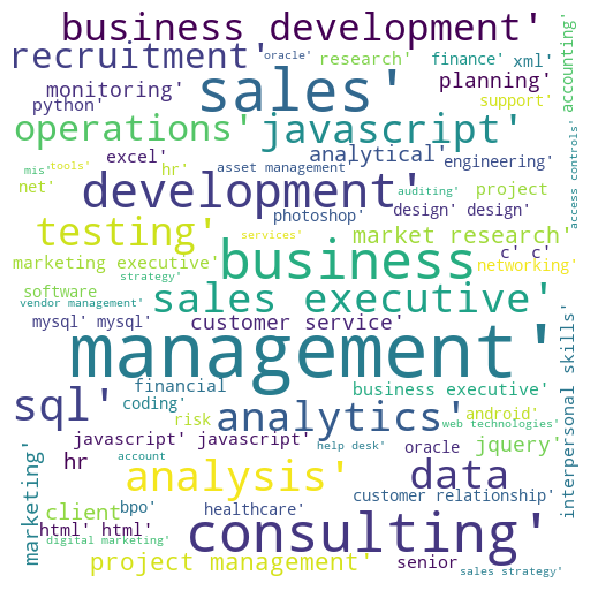

In [77]:
topSkills("Strategy, Management Consulting Firms")

#### Let's see what are the top 10 key skills in Internet, Ecommerce industry

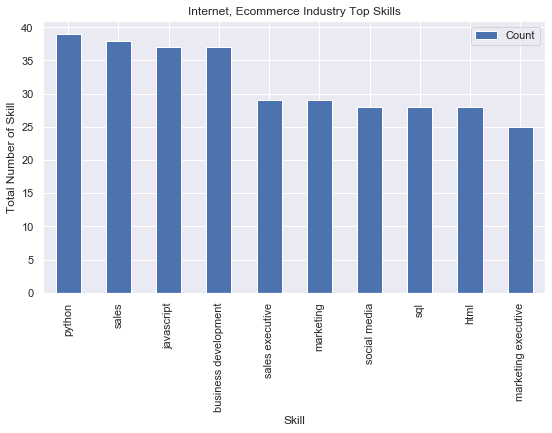

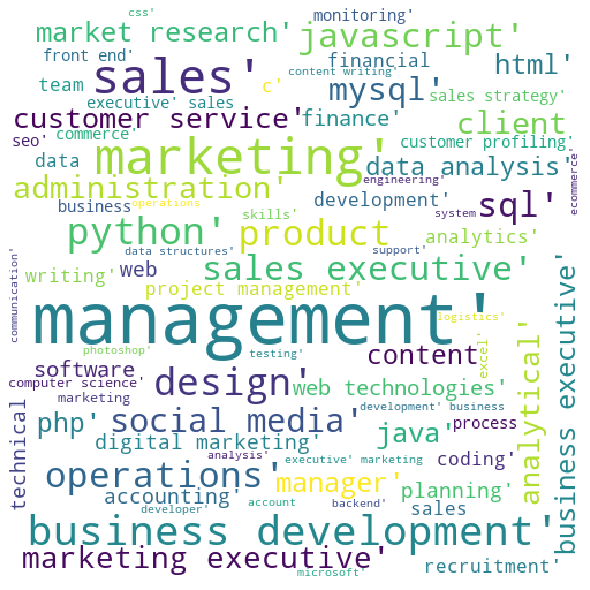

In [78]:
topSkills("Internet, Ecommerce")

#### Let's see what are the top 10 key skills in Meida, Intertainment, Internet industry

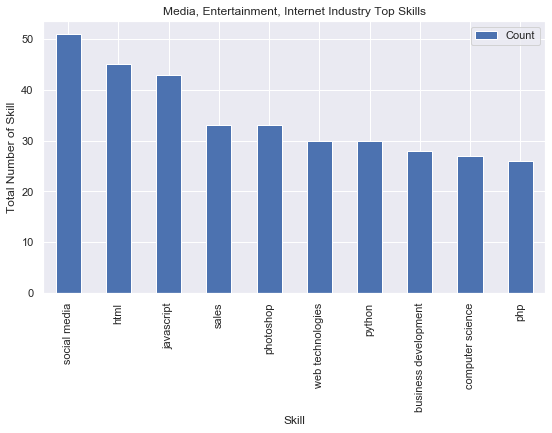

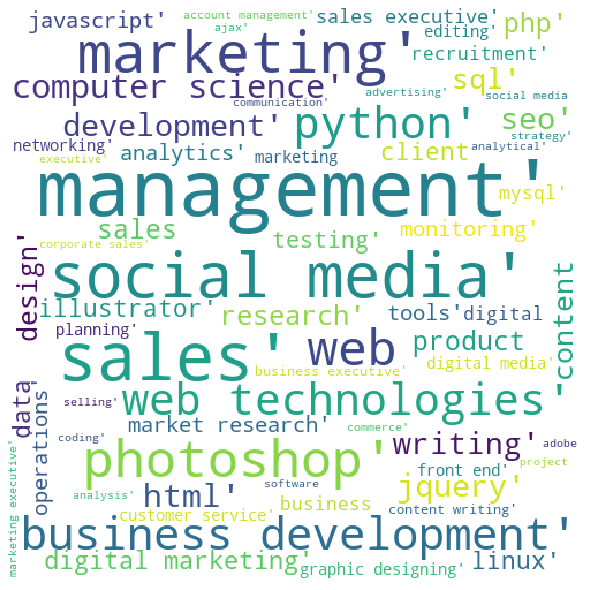

In [79]:
topSkills("Media, Entertainment, Internet")

#### Let's see what are the top 10 key skills in Travel , Hotels , Restuarants , Airlines , Railways industry

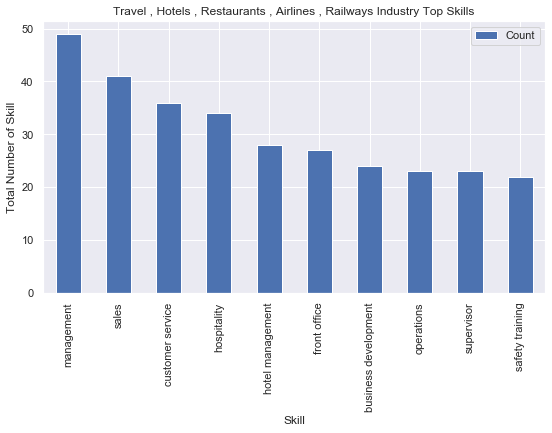

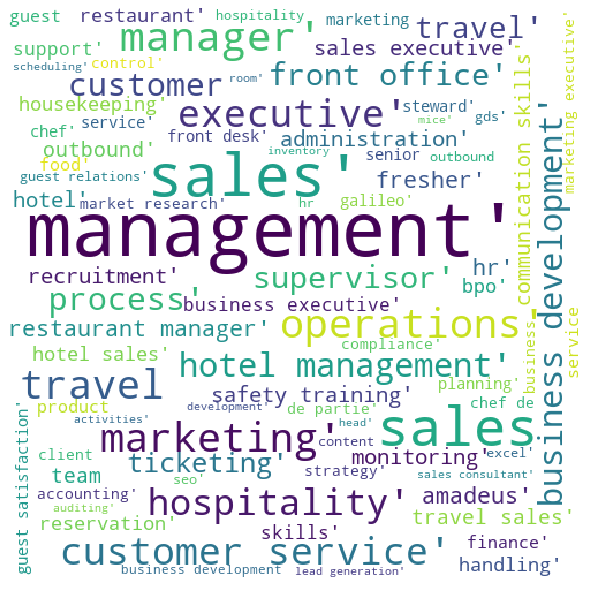

In [80]:
topSkills("Travel , Hotels , Restaurants , Airlines , Railways")

#### Notice that because "management" appears with other words such as "data management", "staff management", it occurs quite often in the skill requirements, even if the word alone does not appear that often.

## Job Title

### Let's see the number of different type of Job Title

In [81]:
DATA = data[1:, 2:]

In [82]:
jobTitle = DATA[:, 0]

In [83]:
dic = {}
for job in jobTitle:
    dic[job] = dic.get(job, 0) + 1

In [84]:
def findTop(arr, key, val, num):
    arr.append((val, key))
    arr.sort(reverse=True)
    if len(arr) > num:
        arr.pop()
    
uniequeJobTitle = []
topTenJobTitle = []
for key, val in dic.items():
    findTop(topTenJobTitle, key, val, 10)
    if val == 1:
        uniequeJobTitle.append(key)

In [85]:
print(len(uniequeJobTitle), "number of unique Job Title")

22325 number of unique Job Title


[Text(0, 0.5, 'Occurence of the Top 10 Job Title'),
 Text(0.5, 0, 'Top 10 Job Title')]

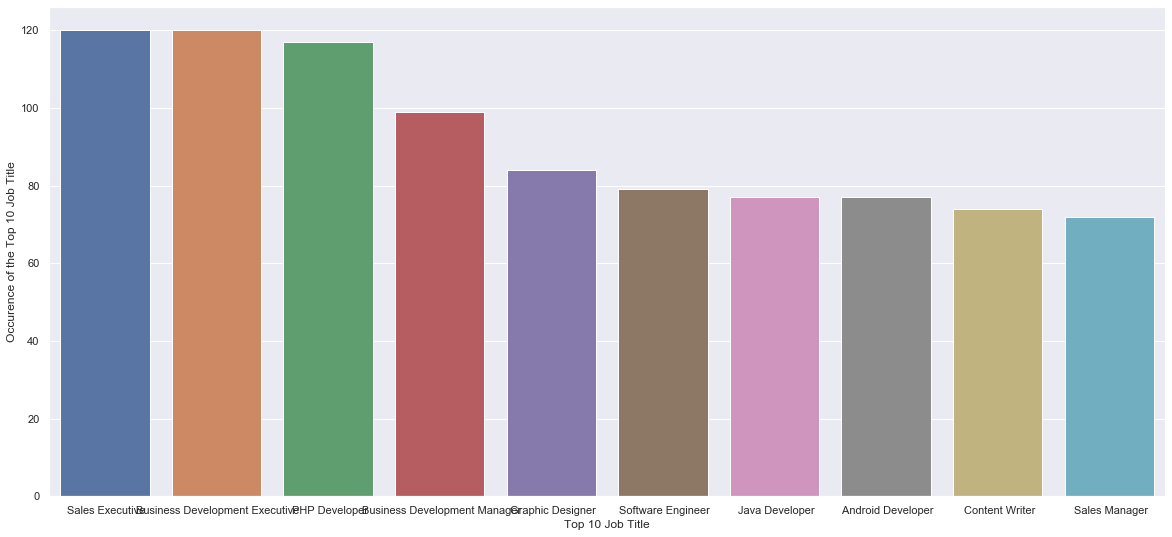

In [101]:
x_pos = [i for i in range(len(topTenJobTitle))]
nums = [words[0] for words in topTenJobTitle]
x = [words[1] for words in topTenJobTitle]
ax = sns.barplot(x=x, y=nums)
ax.set(xlabel="Top 10 Job Title", ylabel = "Occurence of the Top 10 Job Title")

#### Keywords in job title

In [103]:
keywords = {}
wordFilter = ["for", "in", "opening", ""]
for key, val in dic.items():
    for sub in key.split():
        if sub in "~!@#$%^&*()-=+~\|]}[{';: /?.>,<." or sub.lower() in wordFilter:
            continue
        keywords[sub] = keywords.get(sub, 0) + val

In [104]:
print("Number of keywords", len(keywords))

Number of keywords 17633


In [105]:
topTwentyKeywords = []
for key, val in keywords.items():
    findTop(topTwentyKeywords, key, val, 20)

[Text(0, 0.5, 'Occurence of the top 20 keywords in Job Title'),
 Text(0.5, 0, 'Top 20 Keywords')]

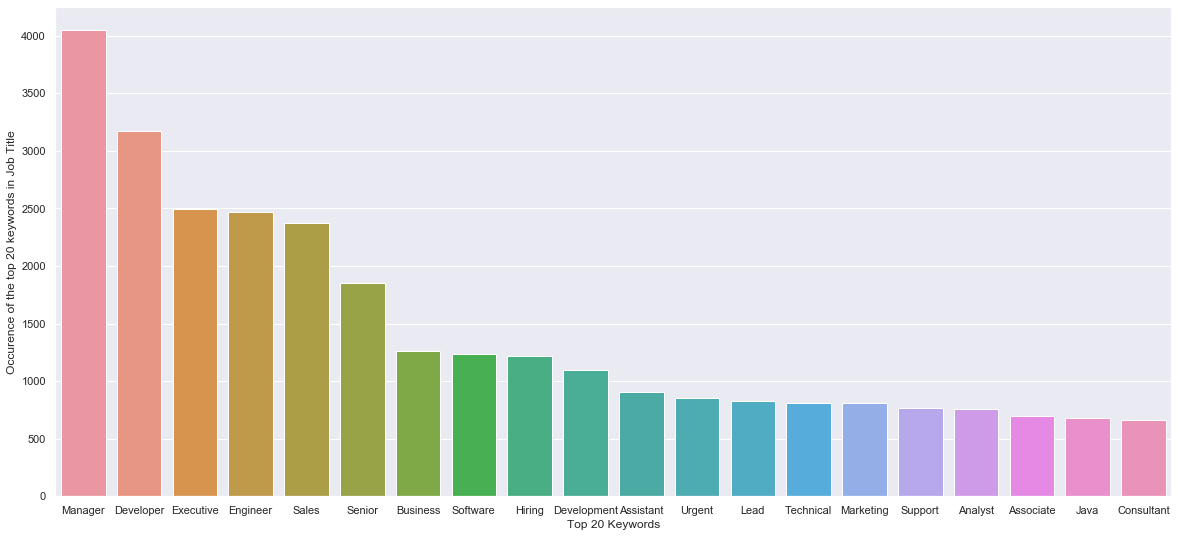

In [107]:
x_pos = [i for i in range(len(topTwentyKeywords))]
nums = [words[0] for words in topTwentyKeywords]
x = [words[1] for words in topTwentyKeywords]
ax = sns.barplot(x=x, y=nums)
ax.set(xlabel="Top 20 Keywords", ylabel = "Occurence of the top 20 keywords in Job Title")

#### "Urgent" stands for job that needs people immediately. Let's find out what kind of job is urgent and where these jobs are.

In [108]:
jobTypeInUrgent = {}
counter = 0
for job in DATA:
    if job[0].lower().find("urgent") >= 0 and job[4]:
        jobTypeInUrgent[job[4]] = jobTypeInUrgent.get(job[4], 0) + 1
        
topTwentyJobInUrgent = []
for key, val in jobTypeInUrgent.items():
    findTop(topTwentyJobInUrgent, key, val, 10)

[Text(0, 0.5, 'Occurence of the top 20 Urgent Role'),
 Text(0.5, 0, 'Top 20 Urgent Roles')]

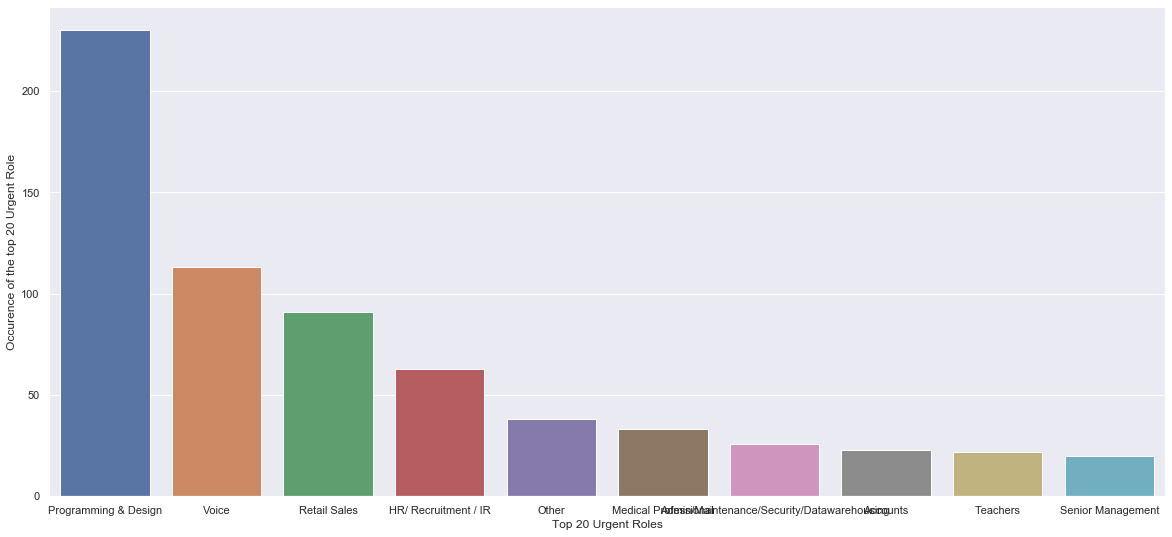

In [109]:
x_pos = [i for i in range(len(topTwentyJobInUrgent))]
nums = [words[0] for words in topTwentyJobInUrgent]
x = [words[1] for words in topTwentyJobInUrgent]
ax = sns.barplot(x=x, y=nums)
ax.set(xlabel="Top 20 Urgent Roles", ylabel = "Occurence of the top 20 Urgent Role")

In [110]:
x

['Programming & Design',
 'Voice',
 'Retail Sales',
 'HR/ Recruitment / IR',
 'Other',
 'Medical Professional',
 'Admin/Maintenance/Security/Datawarehousing',
 'Accounts',
 'Teachers',
 'Senior Management']

#### We can see that Programming & Design has the highest demands and there's still a lot of needs on voice people.<br>I was suprised that teacher is also in top twenty urgent roles